In [1]:
import numpy as np

# axis (축 = 각 차원) 이해하기

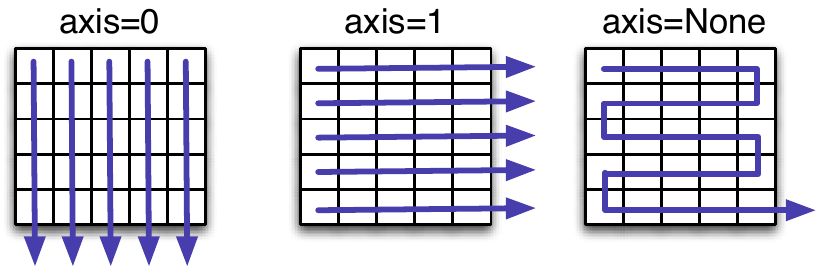
출처(https://i.stack.imgur.com/OuyFd.png)

 - 몇몇 함수에는 axis keyword 파라미터가 존재
 - axis값이 없는 경우에는 전체 데이터에 대해 적용을 의미
 - axis값이 있는 경우에는, 해당 axis를 **따라서** 연산 적용을 의미 
     - 1차원 백터는 axis = 0 1개, 2차원은 axis는 0,1 (2개), 3차원은 axis가 0,1,2(3개) 를 갖는다
---
"따라서" -> "그 방향으로 압축을 한다" 는 의미

* axis를 파라미터로 갖는 함수를 이용하기
 - 거의 대부분의 연산 함수들이 axis 파라미터를 사용
 - 이 경우, 해당 값이 주어졌을 때, 해당 axis를 **따라서** 연산이 적용
   - 따라서 결과는 해당 axis가 제외된 나머지 차원의 데이터만 남게 됨
 - 예) np.sum, np.mean, np.any 등등
 

In [2]:
# 1차원 벡터 생성
x = np.arange(15)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


# 1차원 데이터에 적용하기

In [3]:
# 모든 item을 더한다.
np.sum(x, axis=None)

105

In [4]:
# x는 1차원 -> 축이 1개
# axis=0 은 0번째 축을 sum하라는 의미 (1차원이기 때문에 None과 값이 동일)
np.sum(x, axis=0)

105

In [5]:
# 1차원에는 axis가 1개이기 때문에(최대값이 0) axis=1은 에러가 난다.
np.sum(x, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

# 2차원(행렬)에 적용하기

In [6]:
# 3행 5열로 변경
y = x.reshape(3, -1) 
print("y:\n",y,"\n")


print("y의 0번째 행의 값들만을 sum한 값:",np.sum(y, axis=0))

y:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

y의 0번째 행의 값들만을 sum한 값: [15 18 21 24 27]


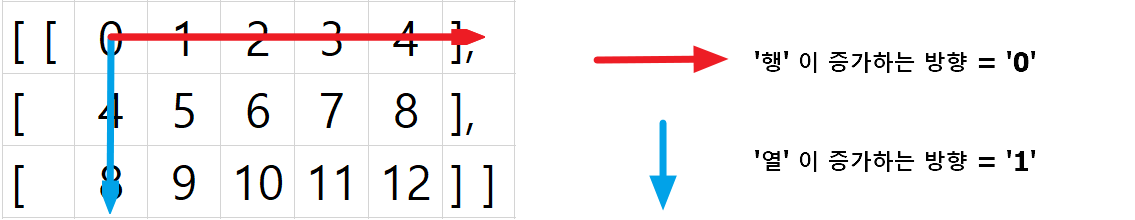

In [7]:
y = x.reshape(3, 5)
print(y,"\n")
print("y의 전체 item을 sum한값:",np.sum(y))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 

y의 전체 item을 sum한값: 105


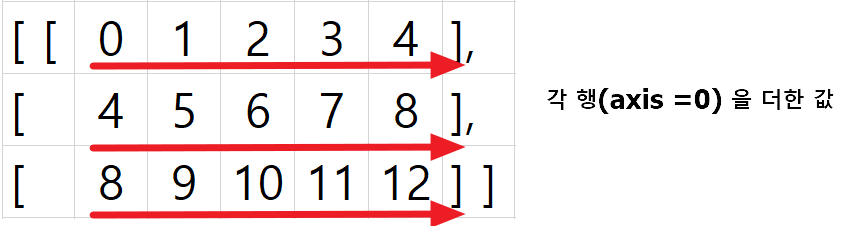

In [8]:
print("y의 각 행을 더한 값:",np.sum(y, axis=1))

y의 각 행을 더한 값: [10 35 60]


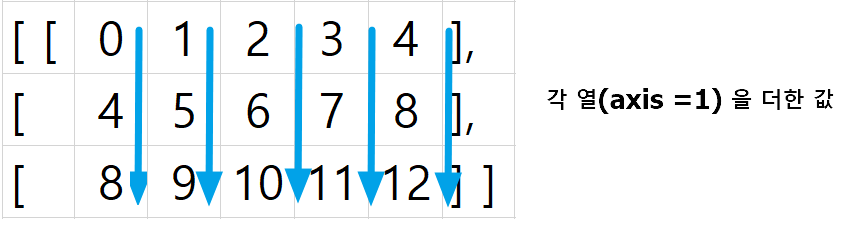

In [9]:
print("y의 각 열을 더한 값:",np.sum(y, axis=0))

y의 각 열을 더한 값: [15 18 21 24 27]


# 3차원 텐서에 적용하기

In [10]:
# 4행 3열 짜리 행렬을 3개 -> 3차원
z = np.arange(36).reshape(3, 4, 3)
print("z:\n",z)

z:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]]


** 3d array는 동일한 행*열을 가진 box를 3개 겹쳐놓은 것이라 생각하면 이해가 쉽다.
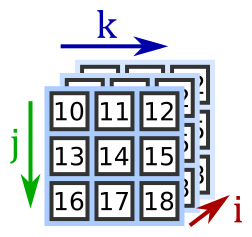

In [11]:
print("z의 모든 원소를 더한 값:",np.sum(z))

z의 모든 원소를 더한 값: 630


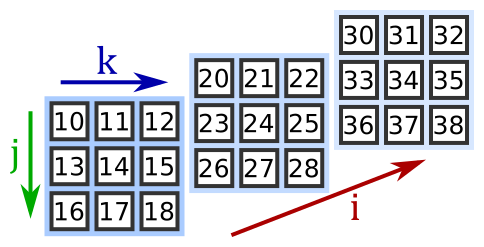

- axis = 0 은, i
- axis = 1 은, j
- axis = 2 은, k

In [12]:
# 각 행렬 별로 동일한 열(axis=0)의 동일한 위치에 있는 값을 더한 값 
print("z의 각 행렬 별로 동일한 열(axis=0)의 동일한 위치에 있는 값을 더한 값 :\n",np.sum(z, axis=0))

z의 각 행렬 별로 동일한 열(axis=0)의 동일한 위치에 있는 값을 더한 값 :
 [[36 39 42]
 [45 48 51]
 [54 57 60]
 [63 66 69]]


In [13]:
# z의 각 행렬 내에서 각 열을 더한 값
print("z의 각 행렬 내에서 각 열을 더한 값:\n",np.sum(z, axis=1))

z의 각 행렬 내에서 각 열을 더한 값:
 [[ 18  22  26]
 [ 66  70  74]
 [114 118 122]]


In [14]:
# z의 각 행렬 내의 각 행을 더한 값
print("z의 각 행렬 내의 각 행을 더한 값:\n",np.sum(z, axis=2))

z의 각 행렬 내의 각 행을 더한 값:
 [[  3  12  21  30]
 [ 39  48  57  66]
 [ 75  84  93 102]]


In [15]:
print("z의 각 행렬 별로 동일한 열(axis=-3)의 동일한 위치에 있는 값을 더한 값 :\n",np.sum(z, axis=-3))

z의 각 행렬 별로 동일한 열(axis=-3)의 동일한 위치에 있는 값을 더한 값 :
 [[36 39 42]
 [45 48 51]
 [54 57 60]
 [63 66 69]]


* axis의 값이 튜플일 경우
 - 해당 튜플에 명시된 모든 axis에 대해서 연산

In [16]:
print("z:\n",z,"\n")

z:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]

 [[24 25 26]
  [27 28 29]
  [30 31 32]
  [33 34 35]]] 



In [17]:
np.sum(z, axis=(0, 2))

array([117, 144, 171, 198])